In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [3]:
# define f0.5 score
from sklearn.metrics import fbeta_score, make_scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

In [4]:
def evaluate_model(y_test, y_pred):
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    disp  = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    disp.set_title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))
    
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0] 
    
    print('Classification Accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred))
    print('Classification Error: %.3f' % (1 - metrics.accuracy_score(y_test, y_pred)))
    print('Sensitivity: %.3f' % metrics.recall_score(y_test, y_pred))
    print('Specificity: %.3f' % (TN / float(TN + FP)))
    print('False Positive Rate: %.3f' % (FP / float(TN + FP)))
    print('Precision: %.3f' % (TP / float(TP + FP)))
    print('F1 Score: %.3f' % metrics.f1_score(y_test, y_pred))
    print('AUC: %.3f' % metrics.roc_auc_score(y_test, y_pred))

In [5]:
def compareAlgorithmsForBarChart(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVM', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    auc_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        auc_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring='roc_auc')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        print(recall_results)    # for testing only
        auc_results.append(auc_cv_results.mean())
        print(auc_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, auc_results, f05_results, names

In [6]:
def barChart(results, score, string):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    
    labels = ['LR', 'SVM', 'Linear SVM', 'NB', 'MLP', 'DT']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects = ax.bar(x , results, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    # annotate bars
    ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f')
    #ax.legend()

    fig.tight_layout()

    # save plot
    fileName = string +'.png'
    print(fileName)
    plt.savefig('figures/baseline/BiB_Vs_BiB-GDM/' + fileName)
    
    plt.show()


In [7]:
def twoGroupsBarChart(results1, string1, results2, string2, score, name):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'SVM', 'Linear SVM', 'NB', 'MLP', 'DT']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, results1, width, label=string1)
    rects2 = ax.bar(x + width/2, results2, width, label=string2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # annotate bars
    i=0
    for container in ax.containers:
        ax.bar_label(ax.containers[i], label_type='edge', fmt='%.2f')
        i=i+1
    
    fig.tight_layout()

    
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/baseline/BiB_Vs_BiB-GDM/' + fileName)
    
    
    plt.show()

In [8]:
def plotPrecisionRecallCurves(X_train, X_test, y_train, y_test, title, filename):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVM', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    
    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        plot_precision_recall_curve(model, X_test, y_test, ax = plt.gca(), name = name)
        
        ax.legend(loc='upper right')
        #plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

        
    plt.title(title)
    
    fig.tight_layout()
    
    # save plot
    fileName = filename +'.png'
    print(fileName)
    plt.savefig('figures/baseline/BiB_Vs_BiB-GDM/' + fileName)

# BiB Dataset

In [9]:
# make stratified folds for cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=False)

# make feature matrix and target matrix
X = pd.read_csv('BibFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibDependentVariableLGAEncoded.csv')

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [34]:
import warnings
#ignore warnings 
warnings.filterwarnings("ignore")

baseline_precision-recall_bib.png


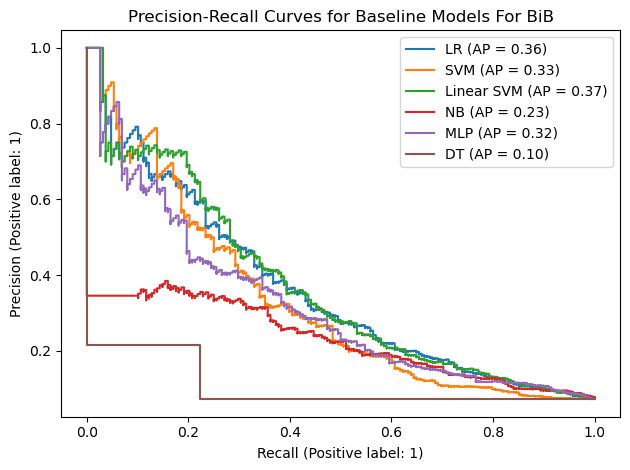

In [35]:
plotPrecisionRecallCurves(X_train, X_test, y_train, y_test,
                         "Precision-Recall Curves for Baseline Models For BiB", "baseline_precision-recall_bib")

In [11]:
precision_bib, recall_bib, auc_bib, f05_bib, names = compareAlgorithmsForBarChart(X_train,y_train)

[0.5648857092564186]
[0.08666666666666667]
[0.7858886914792127]
[0.2600065709792]
[0.5648857092564186, 0.7723076923076924]
[0.08666666666666667, 0.025333333333333336]
[0.7858886914792127, 0.6555920639513945]
[0.2600065709792, 0.10763405427553493]
[0.5648857092564186, 0.7723076923076924, 0.5666666666666667]
[0.08666666666666667, 0.025333333333333336, 0.02]
[0.7858886914792127, 0.6555920639513945, 0.7853284816178181]
[0.2600065709792, 0.10763405427553493, 0.08472898209032591]
[0.5648857092564186, 0.7723076923076924, 0.5666666666666667, 0.20758323485570437]
[0.08666666666666667, 0.025333333333333336, 0.02, 0.4173333333333334]
[0.7858886914792127, 0.6555920639513945, 0.7853284816178181, 0.7420805929044244]
[0.2600065709792, 0.10763405427553493, 0.08472898209032591, 0.2307180416478706]
[0.5648857092564186, 0.7723076923076924, 0.5666666666666667, 0.20758323485570437, 0.36102314302731214]
[0.08666666666666667, 0.025333333333333336, 0.02, 0.4173333333333334, 0.15866666666666668]
[0.78588869147

benchmark_precision_bib.png


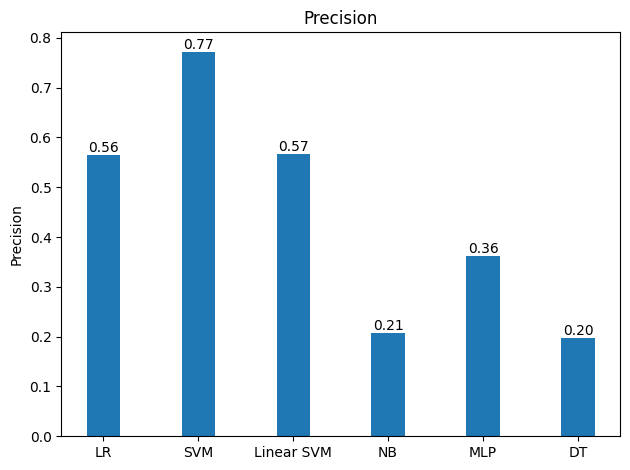

benchmark_recall_bib.png


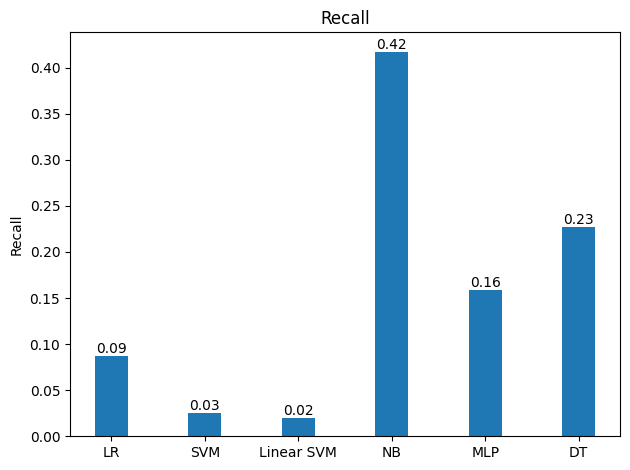

benchmark_auc_bib.png


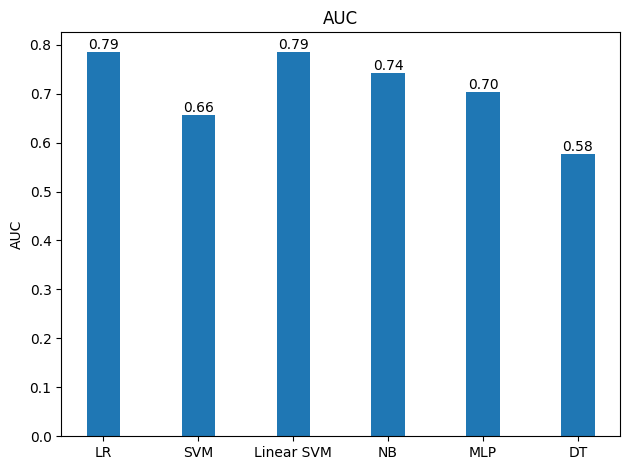

benchmark_f05_bib.png


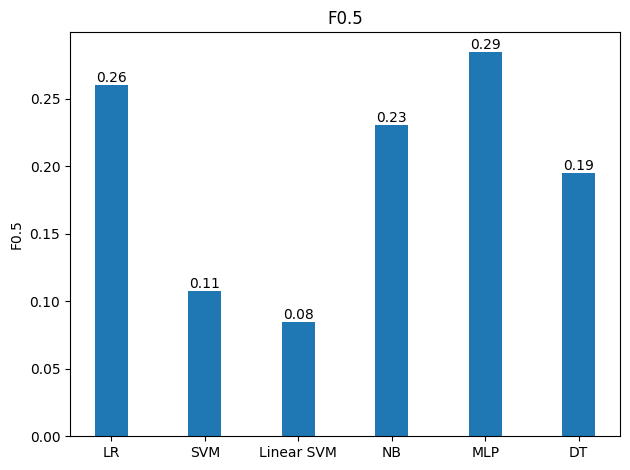

In [12]:
barChart(precision_bib, "Precision", "baseline_precision_bib")
barChart(recall_bib, "Recall", "baseline_recall_bib")
barChart(auc_bib, "AUC", "baseline_auc_bib")
barChart(f05_bib, "F0.5", "baseline_f05_bib")

# BiB-GDM Dataset

In [36]:
# make stratified folds for cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=False)

# make feature matrix and target matrix
X = pd.read_csv('BibGDMFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibGDMDependentVariableLGAEncoded.csv')

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

baseline_precision-recall_bib-gdm.png


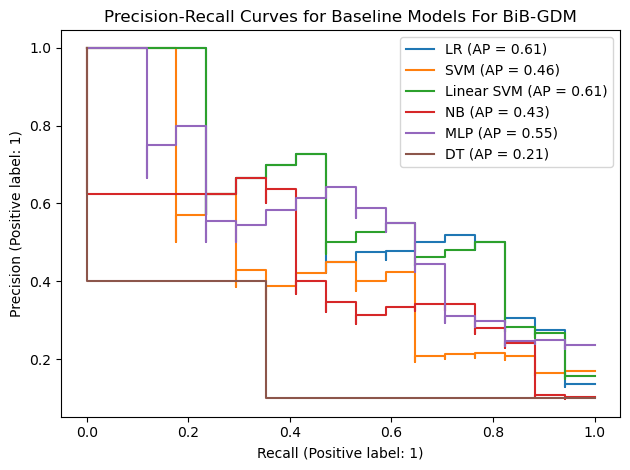

In [37]:
plotPrecisionRecallCurves(X_train, X_test, y_train, y_test,
                         "Precision-Recall Curves for Baseline Models For BiB-GDM", "baseline_precision-recall_bib-gdm")

In [14]:
precision_bib_gdm, recall_bib_gdm, auc_bib_gdm, f05_bib_gdm, names = compareAlgorithmsForBarChart(X_train,y_train)

[0.6046464646464648]
[0.41428571428571426]
[0.8854704163198948]
[0.5530779054916986]
[0.6046464646464648, 0.8]
[0.41428571428571426, 0.07142857142857142]
[0.8854704163198948, 0.8186192347146148]
[0.5530779054916986, 0.2575757575757575]
[0.6046464646464648, 0.8, 0.5472727272727272]
[0.41428571428571426, 0.07142857142857142, 0.4]
[0.8854704163198948, 0.8186192347146148, 0.883952039019103]
[0.5530779054916986, 0.2575757575757575, 0.508574959831912]
[0.6046464646464648, 0.8, 0.5472727272727272, 0.13159319672635944]
[0.41428571428571426, 0.07142857142857142, 0.4, 0.9]
[0.8854704163198948, 0.8186192347146148, 0.883952039019103, 0.7771957922852112]
[0.5530779054916986, 0.2575757575757575, 0.508574959831912, 0.15707843513956415]
[0.6046464646464648, 0.8, 0.5472727272727272, 0.13159319672635944, 0.41454545454545455]
[0.41428571428571426, 0.07142857142857142, 0.4, 0.9, 0.3571428571428571]
[0.8854704163198948, 0.8186192347146148, 0.883952039019103, 0.7771957922852112, 0.8361265411190896]
[0.55307

benchmark_precision_bib-gdm.png


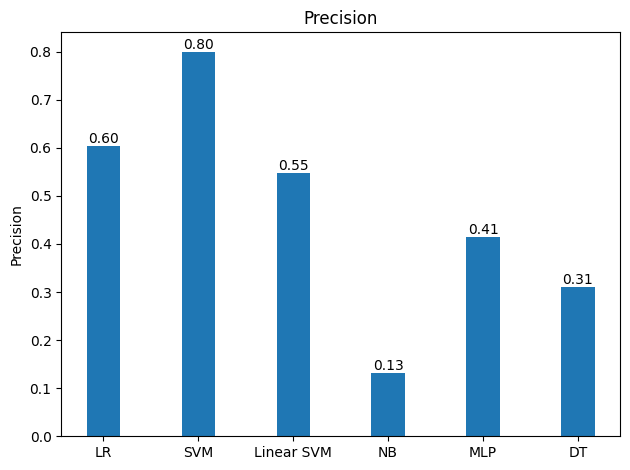

benchmark_recall_bib-gdm.png


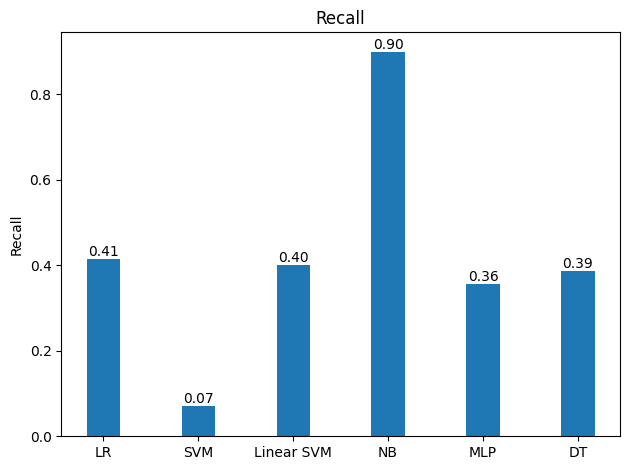

benchmark_auc_bib-gdm.png


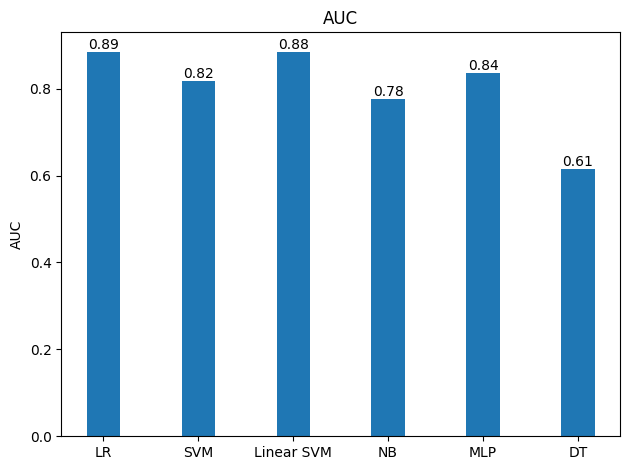

benchmark_f05_bib-gdm.png


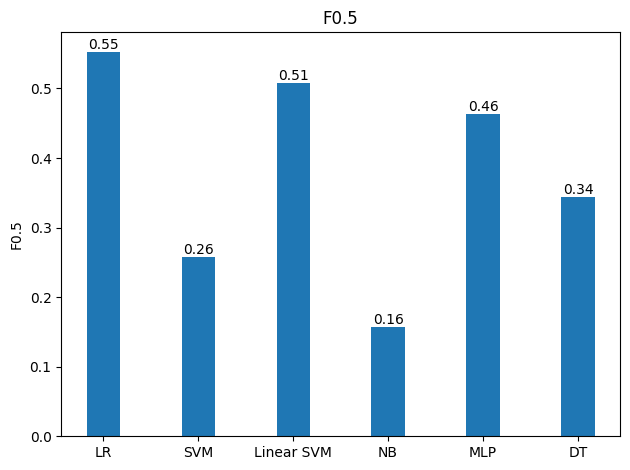

In [15]:
barChart(precision_bib_gdm, "Precision", "benchmark_precision_bib-gdm")
barChart(recall_bib_gdm, "Recall", "benchmark_recall_bib-gdm")
barChart(auc_bib_gdm, "AUC", "benchmark_auc_bib-gdm")
barChart(f05_bib_gdm, "F0.5", "benchmark_f05_bib-gdm")

bib_vs_bib-gdm_f05.png


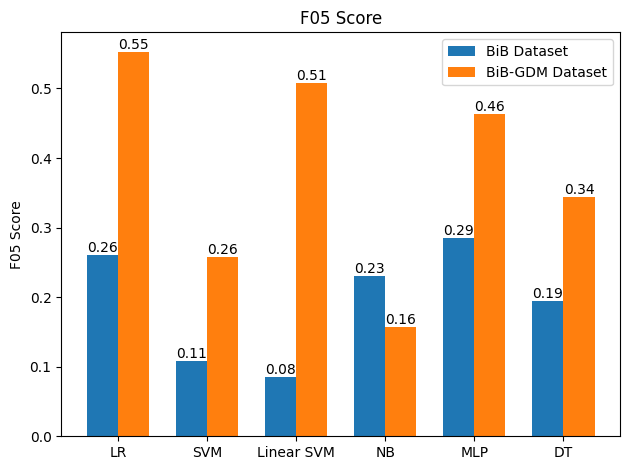

bib_vs_bib-gdm_recall.png


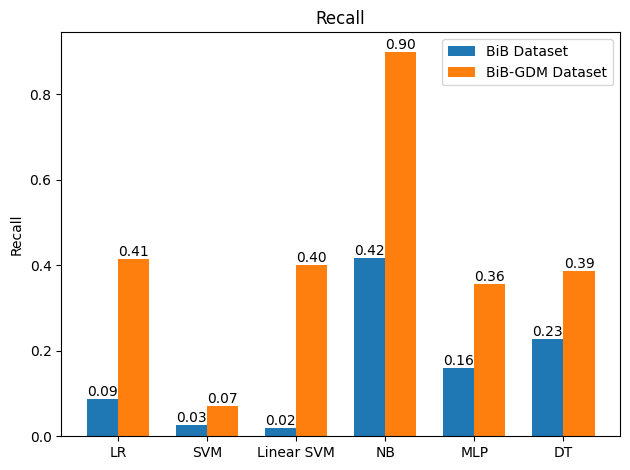

bib_vs_bib-gdm_precision.png


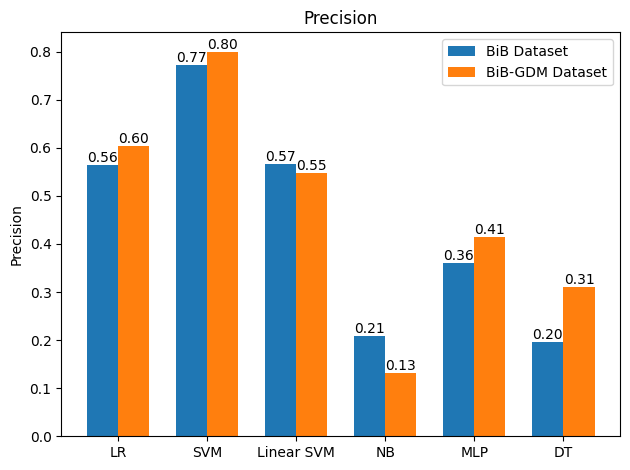

In [30]:
# plot BiB vs. BiB-GDM

# twoGroupsBarChart(results1, string1, results2, string2, score, name):

twoGroupsBarChart(f05_bib, "BiB Dataset", f05_bib_gdm,
                  "BiB-GDM Dataset", "F05 Score", "bib_vs_bib-gdm_f05")

twoGroupsBarChart(recall_bib, "BiB Dataset", recall_bib_gdm, "BiB-GDM Dataset",
                  "Recall", "bib_vs_bib-gdm_recall")

twoGroupsBarChart(precision_bib, "BiB Dataset", precision_bib_gdm, "BiB-GDM Dataset",
                  "Precision", "bib_vs_bib-gdm_precision")
